In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/Administrator.PC-20160914KUGY/Desktop/comments/comment.csv',encoding='gb18030')

In [3]:
df.head()

,content,creationTime,nickname,productColor,productSize,referenceId,userClientShow,userLevelName
0,卖家居然隐藏了我的手机号！是我的手机号！既然看不到手机号，快递员如何联系我？搞得我第三天给电...,2017-06-17 21:15:37,陳***-,糖果色蕾丝卡通印花,M,3750799,来自京东Android客户端,PLUS会员
1,不好，质量也不好，很容易变形，差劲，还脱色，,2017-06-13 16:17:54,陳***-,清新少女印花,M,3750811,来自京东Android客户端,PLUS会员
2,非常非常失望，打开看，蝴蝶结就掉了一个。蕾丝缝合处压边只压一点，做工粗糙，快递到手里不用拆，...,2017-12-11 12:14:33,j***4,糖果色蕾丝卡通印花,M,3750799,来自京东iPhone客户端,金牌会员
3,一直都想不通，为啥一单退算三次,2017-06-17 16:37:09,忽***猫,糖果色蕾丝卡通印花,L,4197540,来自京东Android客户端,PLUS会员
4,一星都不想给 买的自营的居然给发的韵达快递 从付款到收货10多天 京东也开始忽悠让了,2017-11-21 23:05:57,j***h,糖果色蕾丝卡通印花,L,4197540,来自京东iPhone客户端,PLUS会员


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 8 columns):
content           5356 non-null object
creationTime      5356 non-null object
nickname          5356 non-null object
productColor      5259 non-null object
productSize       5257 non-null object
referenceId       5356 non-null int64
userClientShow    5017 non-null object
userLevelName     5356 non-null object
dtypes: int64(1), object(7)
memory usage: 334.8+ KB


In [5]:
comment_data = df.copy()
comment_data['month'] = comment_data['creationTime'].astype('datetime64[M]')
comment_data.head()

,content,creationTime,nickname,productColor,productSize,referenceId,userClientShow,userLevelName,month
0,卖家居然隐藏了我的手机号！是我的手机号！既然看不到手机号，快递员如何联系我？搞得我第三天给电...,2017-06-17 21:15:37,陳***-,糖果色蕾丝卡通印花,M,3750799,来自京东Android客户端,PLUS会员,2017-06-01
1,不好，质量也不好，很容易变形，差劲，还脱色，,2017-06-13 16:17:54,陳***-,清新少女印花,M,3750811,来自京东Android客户端,PLUS会员,2017-06-01
2,非常非常失望，打开看，蝴蝶结就掉了一个。蕾丝缝合处压边只压一点，做工粗糙，快递到手里不用拆，...,2017-12-11 12:14:33,j***4,糖果色蕾丝卡通印花,M,3750799,来自京东iPhone客户端,金牌会员,2017-12-01
3,一直都想不通，为啥一单退算三次,2017-06-17 16:37:09,忽***猫,糖果色蕾丝卡通印花,L,4197540,来自京东Android客户端,PLUS会员,2017-06-01
4,一星都不想给 买的自营的居然给发的韵达快递 从付款到收货10多天 京东也开始忽悠让了,2017-11-21 23:05:57,j***h,糖果色蕾丝卡通印花,L,4197540,来自京东iPhone客户端,PLUS会员,2017-11-01


In [6]:
import re
import unicodedata
def sp(data):
    a = unicodedata.normalize('NFKC',data)
    b = re.split(r'[,.!?:;\s。&hellip]\s*',a)
    while '' in b:
        b.remove('')
    return b

comment_data['split_content'] = comment_data['content'].apply(sp)

In [7]:
import jieba
import jieba.analyse
def jieba_sp(data):
    a = jieba.analyse.extract_tags(data,50, withWeight=False)
    return a

comment_data['jieba_content'] = comment_data['content'].apply(jieba_sp)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\ADMINI~1.PC-\AppData\Local\Temp\jieba.cache
Loading model cost 0.942 seconds.
Prefix dict has been built succesfully.


In [8]:
# referenceId_counts = comment_data.groupby('referenceId')['referenceId'].count()
# ind = referenceId_counts.nlargest(10).index
# imp_data = comment_data.loc[comment_data['referenceId'].isin(ind)].reset_index(drop=True)
# isin()相当于SQL的 where ... in ...
ind = ['3750799','4674129','4197540','4311408','4311406','4674097','6673126','6673110']
imp_data = comment_data.loc[comment_data['referenceId'].isin(ind)].reset_index(drop=True)

In [9]:
def word_list(columns):
    word_list = []
    for i in range(len(imp_data[columns])):
        word_list.extend(imp_data[columns][i])
    return word_list

In [10]:
from wordcloud import WordCloud

In [11]:
path = 'C:/Windows/Fonts/simkai.ttf'
wordcloud_sp = WordCloud(background_color="white",width=1000, height=860, margin=2,font_path=path).generate(str(word_list('split_content')))
wordcloud_jieba = WordCloud(background_color="white",width=1000, height=860, margin=2,font_path=path).generate(str(word_list('jieba_content')))

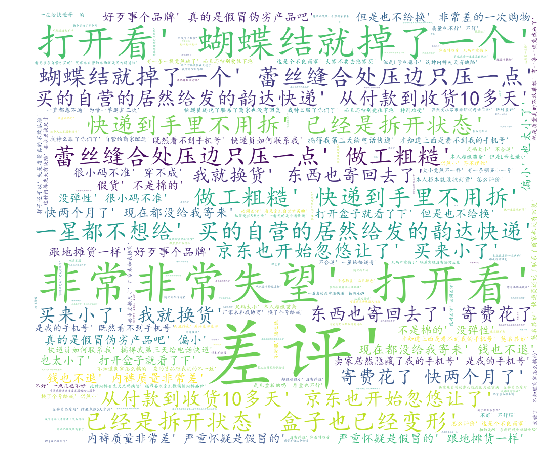

In [12]:
fig,ax = plt.subplots(figsize=(10,8))
plt.imshow(wordcloud_sp)
plt.axis("off")
plt.show()

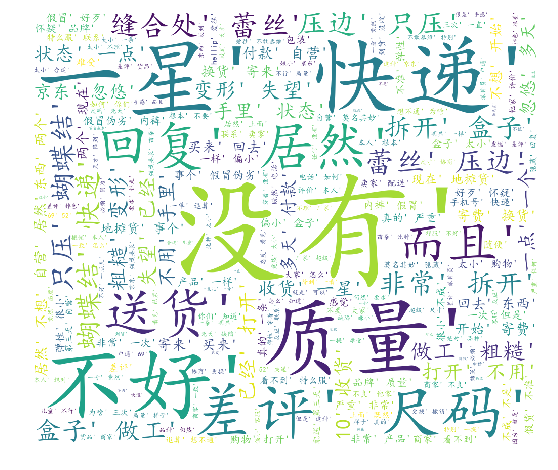

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
plt.imshow(wordcloud_jieba)
plt.axis("off")
plt.show()

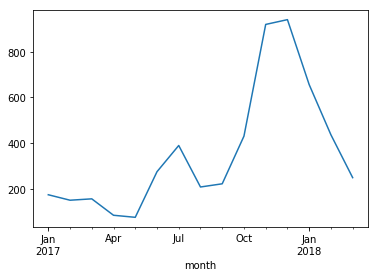

In [14]:
comment_data.groupby('month').count()['content'].plot()